# **Team BADI - Bias in Home Mortgage Bank Loans**

Project Goal: Create a CNN model for predicting whether a customer is eligible for a home loan or not using important features like `ApplicantIncome`, `LoanAmount`, `CoapplicantIncome`, `Loan_Amount_Term`, `Credit_History`. We will also clean the data, create visualizations, describe the importance of our features, and analyze fairness using Aequitas. 

In [95]:
!pip install opendatasets
import opendatasets as od

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
od.download('https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset')

Skipping, found downloaded files in "./loan-eligible-dataset" (use force=True to force download)


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
loans = pd.read_csv('/content/loan-eligible-dataset/loan-train.csv')

# **Dataset preview**

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

[Loans Eligible Dataset](https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset?datasetId=831855&searchQuery=random+forest)


In [99]:
loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [100]:
print("Shape: ", loans.shape)

Shape:  (614, 13)


In [101]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [102]:
loans.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# **Data Cleaning & Manipulation**


In this section, we clean the dataset by dropping null values, as well as replacing null values with a respective value depending on the type of variable, whether it is numerical or categorical.

In [103]:
loans.drop('Loan_ID', axis=1, inplace=True)
loans.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [104]:
loans['Credit_History'].fillna(0, inplace=True)
loans.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [105]:
loans['Dependents'].fillna('0', inplace=True)
loans.isnull().sum()

Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [106]:
loans['Self_Employed'].fillna('No', inplace=True)
loans.isnull().sum()

Gender               13
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [107]:
loans['Gender'].fillna('unknown', inplace=True)
loans['Married'].fillna('unknown', inplace=True)
loans.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [108]:
len(loans)

614

# **Data Visualization**

<Axes: >

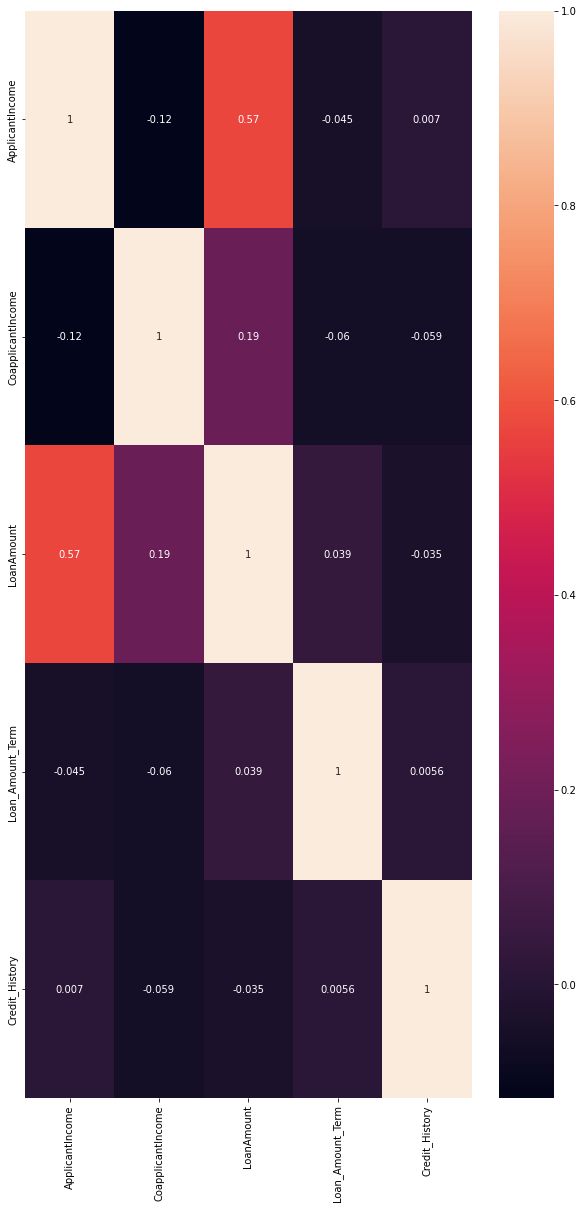

In [109]:
sns.heatmap(loans.corr(), annot = True)

`ApplicantIncome` and `LoanAmount` have the highest correlation out of all the numerical variables, but it's still a weak correlation.

In [110]:
pip install association-metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: >

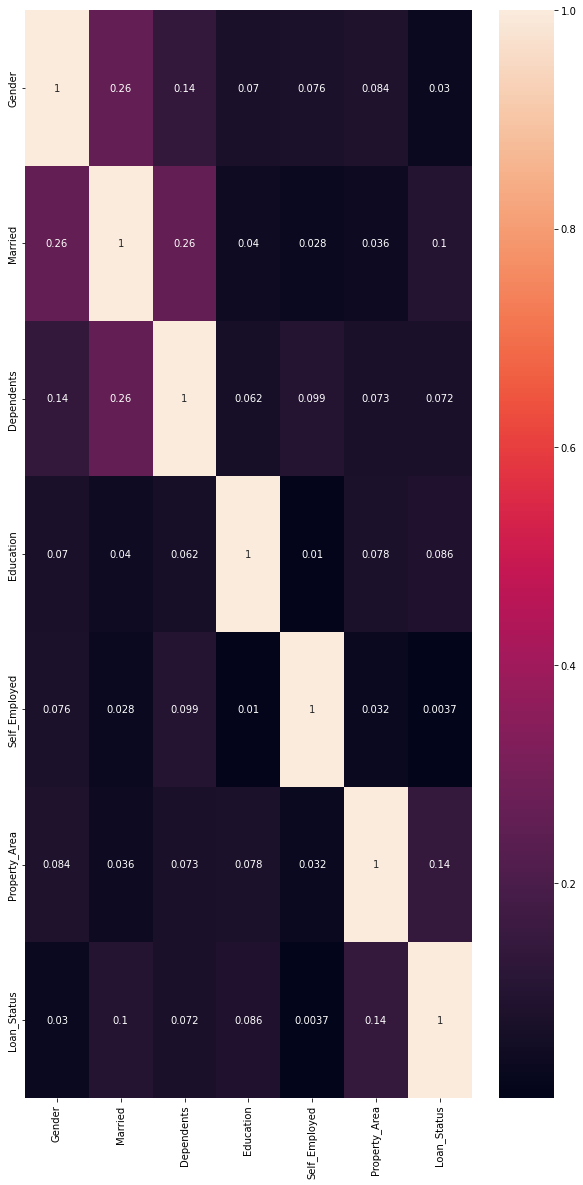

In [111]:
import association_metrics as am
loans2 = loans.apply(lambda x: x.astype("category") if x.dtype == "O" else x)
cramersv = am.CramersV(loans2) 
sns.heatmap(cramersv.fit(), annot = True)

Cramer's V is used to measure correlation between categorical variables. There are no strong correlations.

A Chi-Squared test is used here to measure if there's any difference in the loan outcome, `Loan_Status`, between males and females. This is determined using a p-value (explained in a later cell).

$H_{O}$: There is no difference in loan outcome between males and females.

$H_{A}$: There is a difference in loan outcome between males and females. 

In [112]:
ct = pd.crosstab(index = loans.Gender, columns = loans.Loan_Status)
ct

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339
unknown,5,8


In [113]:
from scipy.stats import chi2_contingency
chisq = chi2_contingency(ct)
chisq[1]

0.7573361980618397

If the p-value is very small (<.05), then the null hypothesis is rejected. Otherwise, if the p-value is big (>.05), the alternate hypothesis is rejected.

In this case, the p-value is very big, indicating that there isn't sufficient evidence to prove that there is a difference in loan outcome between males and females. 

<Axes: xlabel='Loan_Status', ylabel='count'>

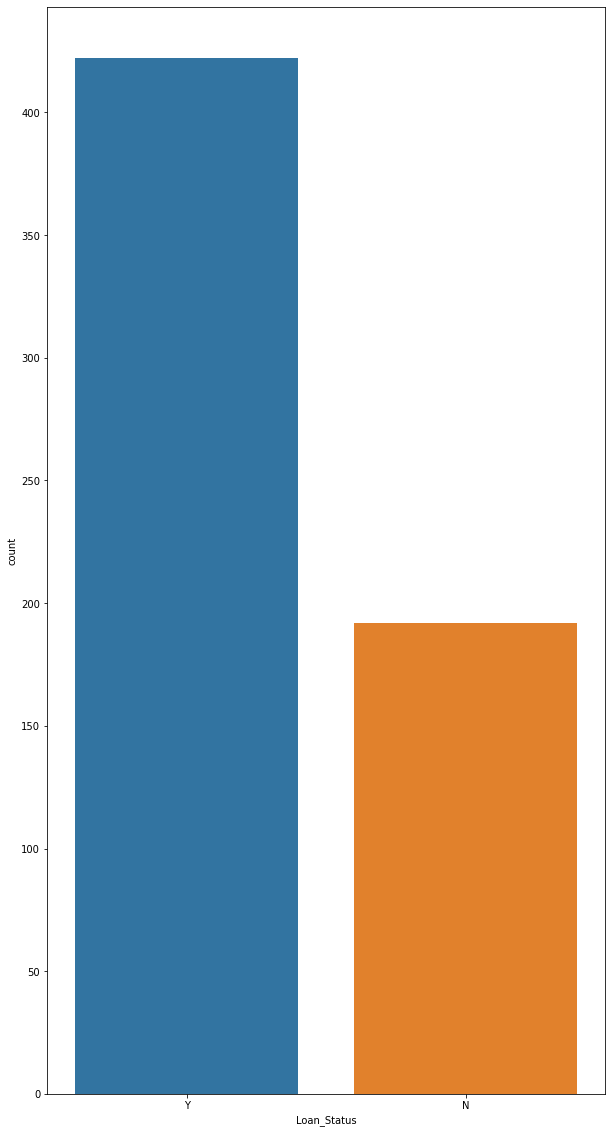

In [114]:
sns.countplot(data = loans, x = 'Loan_Status')

The dataset mostly comprises of approved instances of bank loans.

<Axes: xlabel='Gender', ylabel='count'>

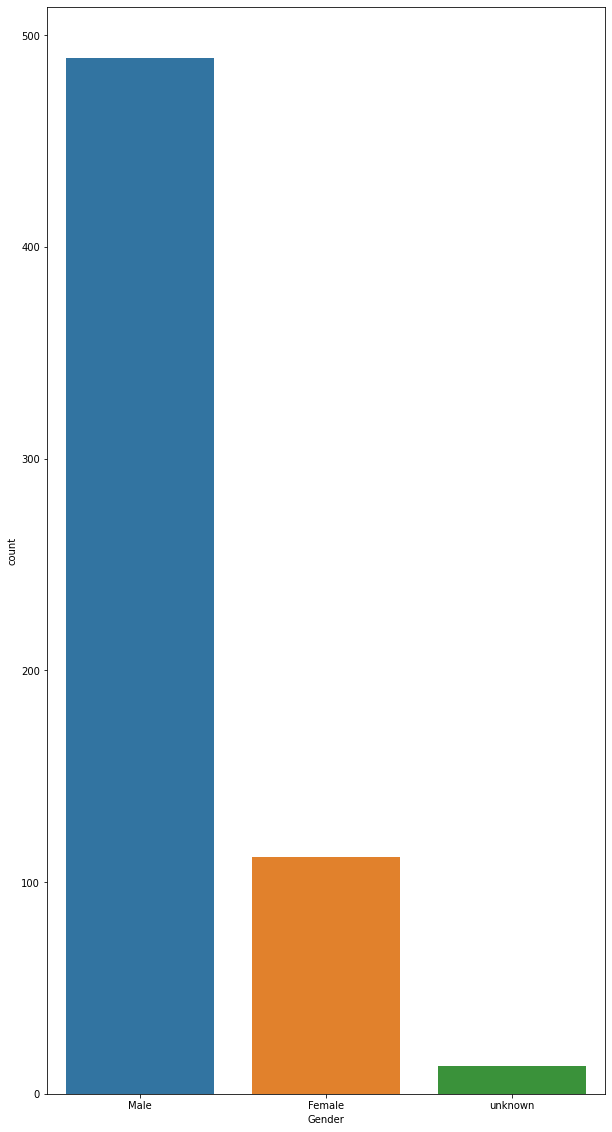

In [115]:
sns.countplot(data = loans, x = 'Gender')

The dataset includes mostly males.

<Axes: xlabel='Loan_Status', ylabel='count'>

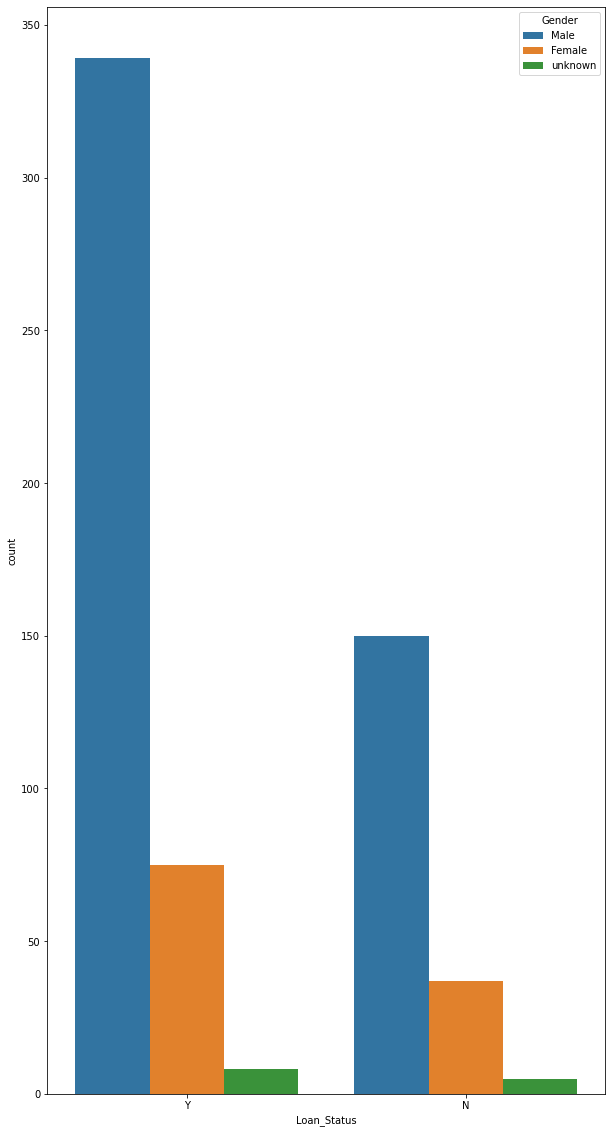

In [116]:
sns.countplot(data = loans, x = 'Loan_Status', hue = 'Gender')

Due to the dataset being mostly male dominated, they have both more `Yes` and `No` than females. Although, proportionaly it seems females get far less approvals than males as they make up less than 25% of the approvals of males, compared to making up about one-third of the denials of males.

<Axes: xlabel='Loan_Status', ylabel='count'>

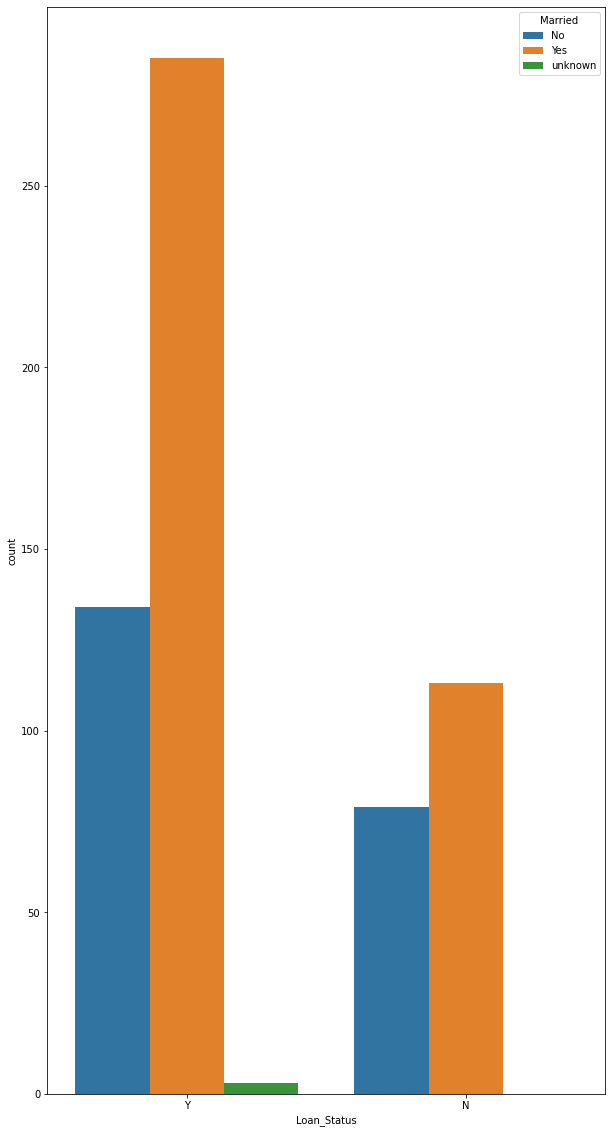

In [117]:
sns.countplot(data = loans, x = 'Loan_Status', hue = 'Married')

It seems loan approval for `Married` couples is almost double than that of `Non-married` entities.

<Axes: xlabel='Education', ylabel='count'>

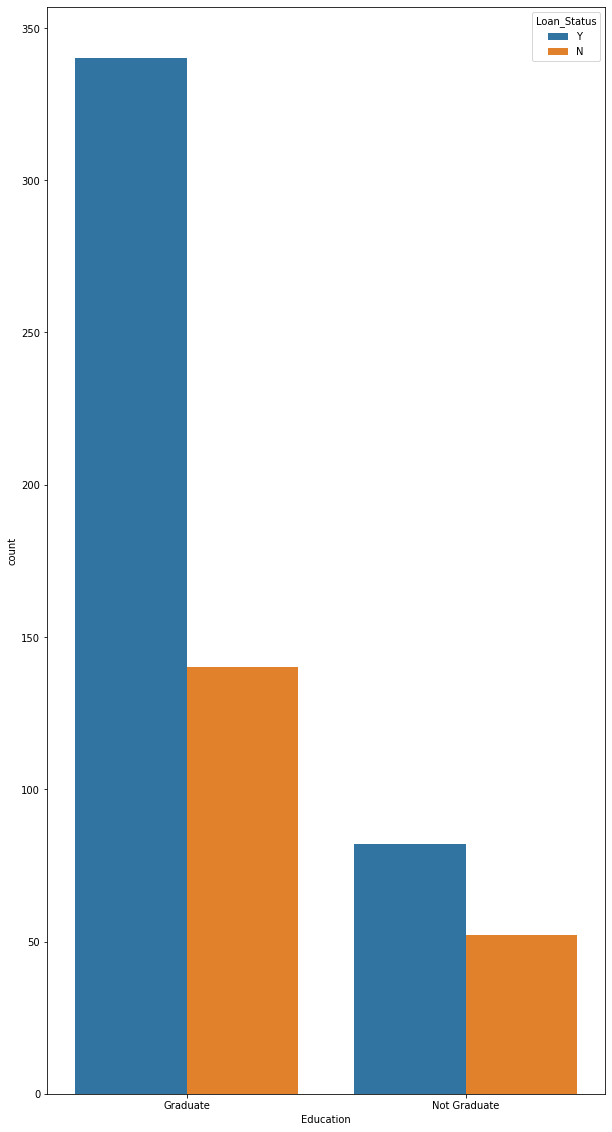

In [118]:
sns.countplot(data = loans, x = 'Education', hue = 'Loan_Status')

It seems the dataset comprises mostly of `Graduate` entities compared to `Not Graduate`. Many more `Graduate` entities are approved than denied for the loan.

<Axes: xlabel='LoanAmount', ylabel='Count'>

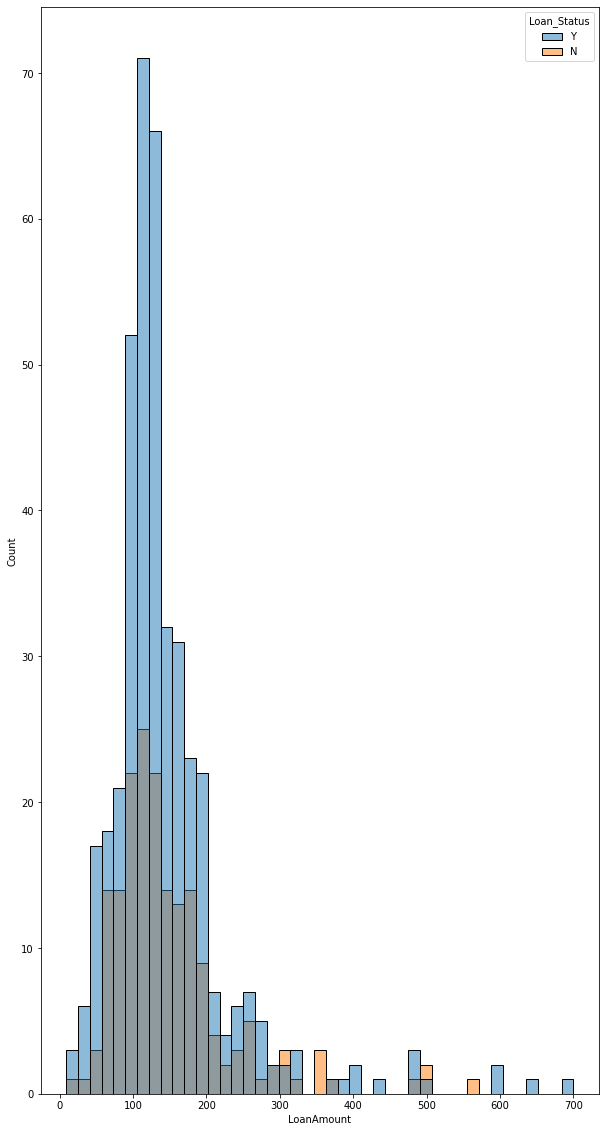

In [119]:
sns.histplot(data = loans, x = 'LoanAmount', hue = 'Loan_Status')

The distribution for the `LoanAmount` for both loan approvals and denials follow the same pattern. They are both skewed to the right and unimodal.

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

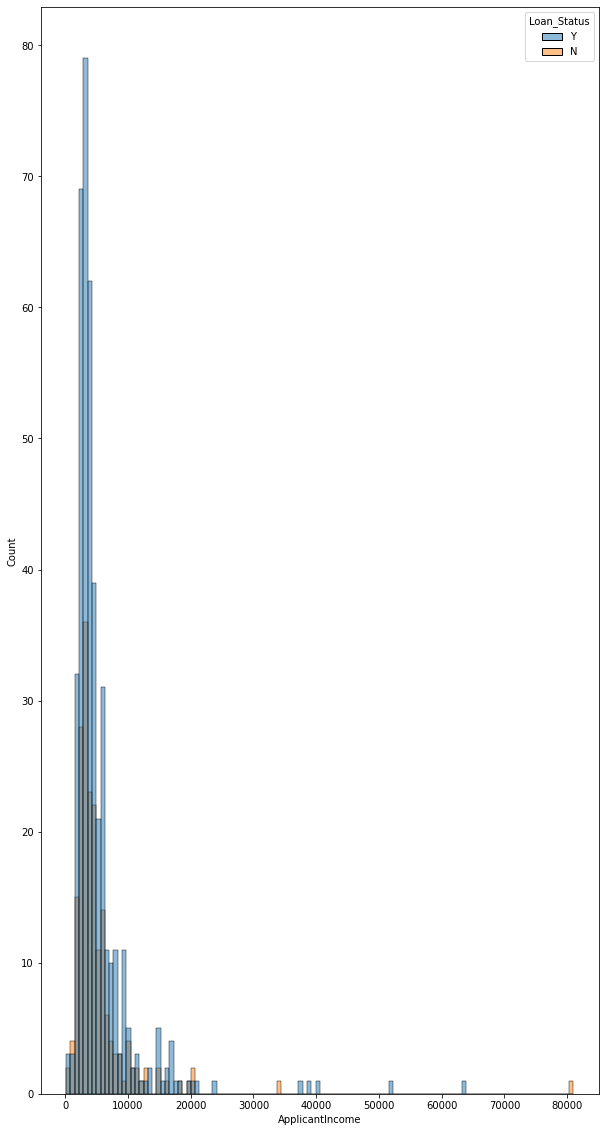

In [120]:
sns.histplot(data = loans, x = 'ApplicantIncome', hue = 'Loan_Status')

The same patterns as the last graph follows for this one as well.

<Axes: xlabel='Dependents', ylabel='count'>

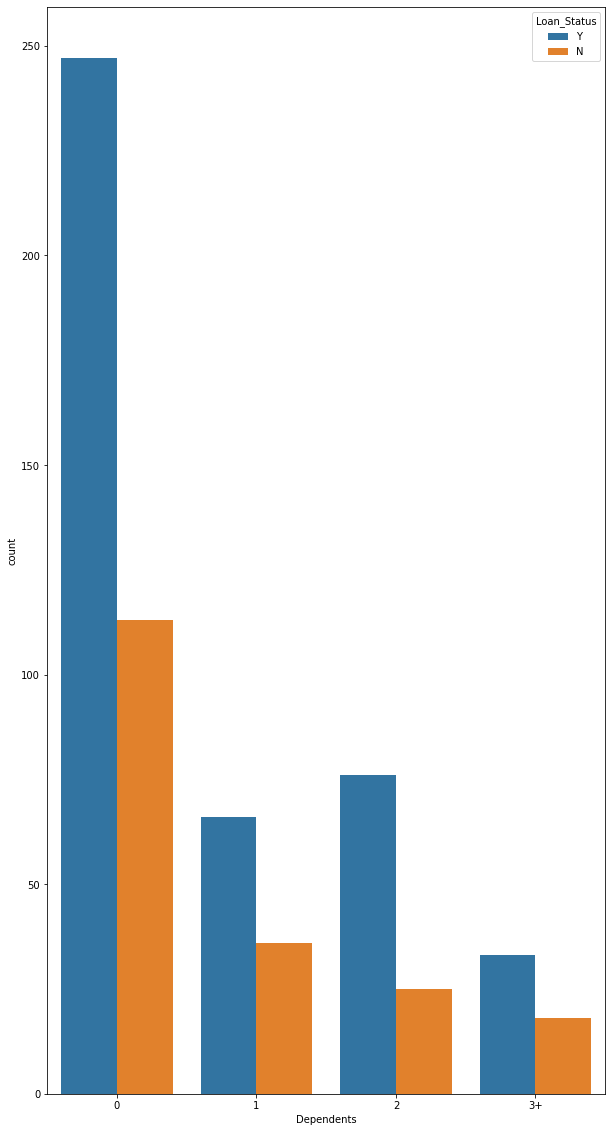

In [121]:
sns.countplot(data = loans, x = 'Dependents', hue = 'Loan_Status')

The dataset comprises of more entities with `0` dependents than more than `0` dependents. The loan approval rate, however, is always almost double for every case than denial. 

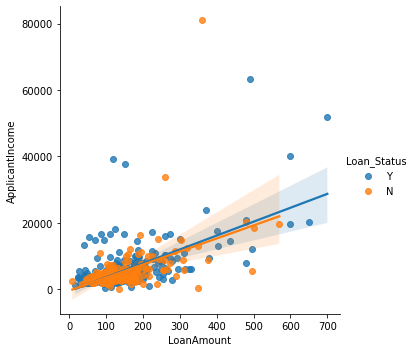

In [122]:
sns.lmplot(data = loans, x = 'LoanAmount', y = 'ApplicantIncome', hue = 'Loan_Status')

It seems that the higher the `ApplicantIncome`, the higher the requested `LoanAmount`. If looked at carefully, we realize that there's a certain point in `ApplicantIncome` (around 17500) for which after that point there are a lot more approvals than denials. It also seems that the denials are clustered tighter than the approvals (except for a few outliers), whereas the approvals are scattered throughout the graph.

<Axes: xlabel='Property_Area', ylabel='count'>

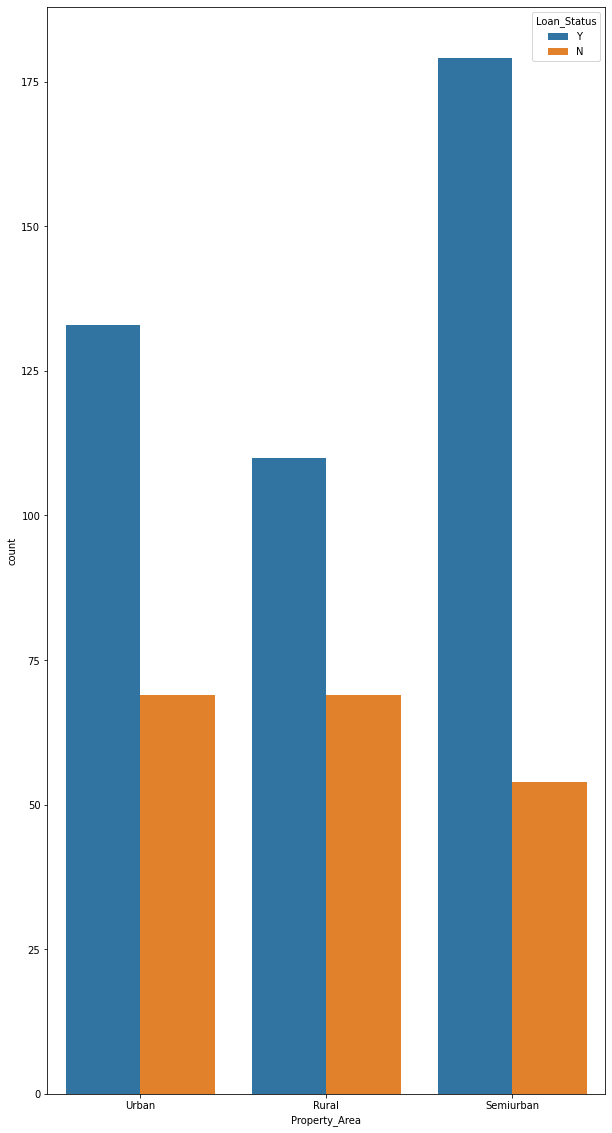

In [123]:
sns.countplot(data = loans, x = 'Property_Area', hue = 'Loan_Status')

The loan approval rate for `Semiurban` properties is significantly higher than the denials for the same property-type as well as the approvals for other property-types.

<Axes: xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

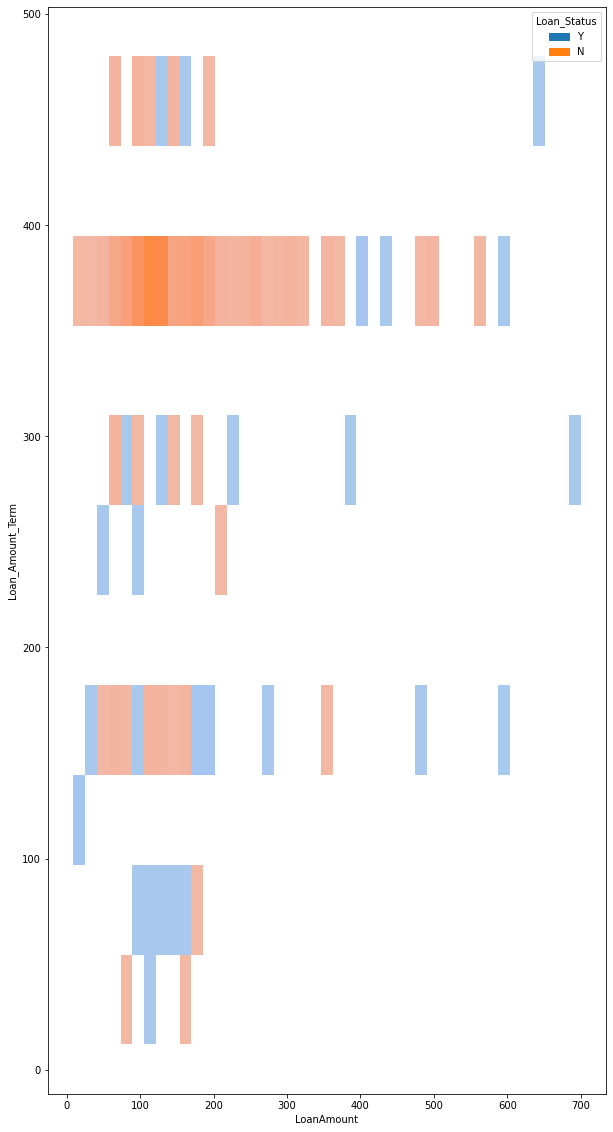

In [124]:
sns.histplot(data = loans, x = 'LoanAmount', y = 'Loan_Amount_Term', hue = 'Loan_Status')

It seems that if a low `LoanAmount` has a very high `Loan_Amount_Term`, it results in a denial. This is probably because a high repayment term might indicate some sort of inability to repay the loan.

<Axes: xlabel='Credit_History', ylabel='count'>

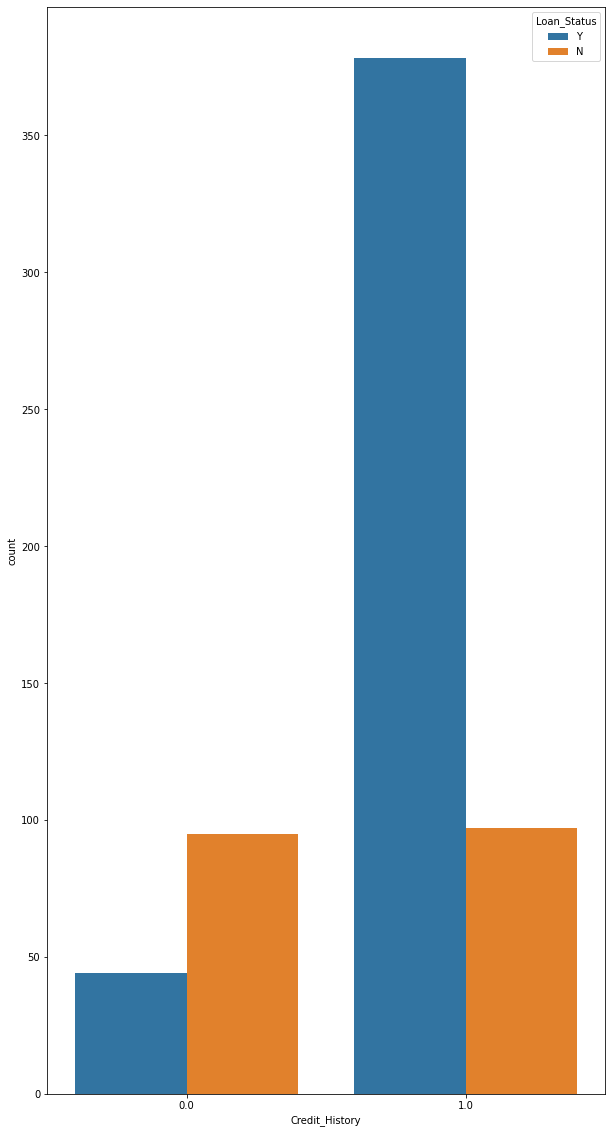

In [125]:
sns.countplot(data = loans, x = 'Credit_History', hue = 'Loan_Status')

It seems that loan approval depends heavily on if `Credit_History` complies with the criteria of the loan company.

<Axes: xlabel='Self_Employed', ylabel='count'>

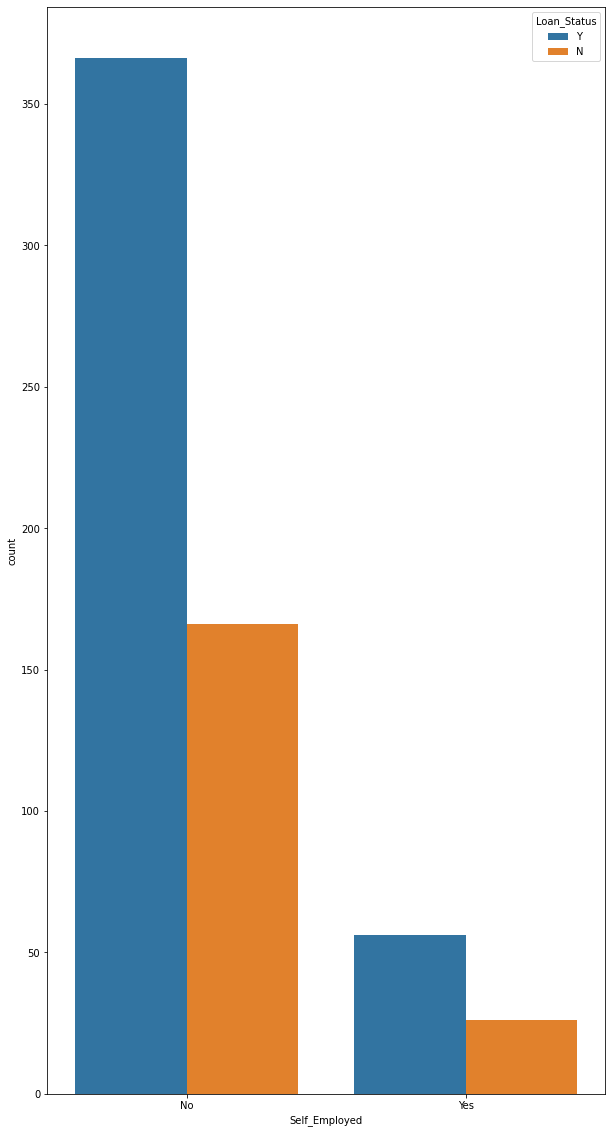

In [126]:
sns.countplot(data = loans, x = 'Self_Employed', hue = 'Loan_Status')

The dataset comprises mostly of entities that are not `Self_Employed`. The approval rate of both groups is double that of the denial respectively.

<Axes: xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

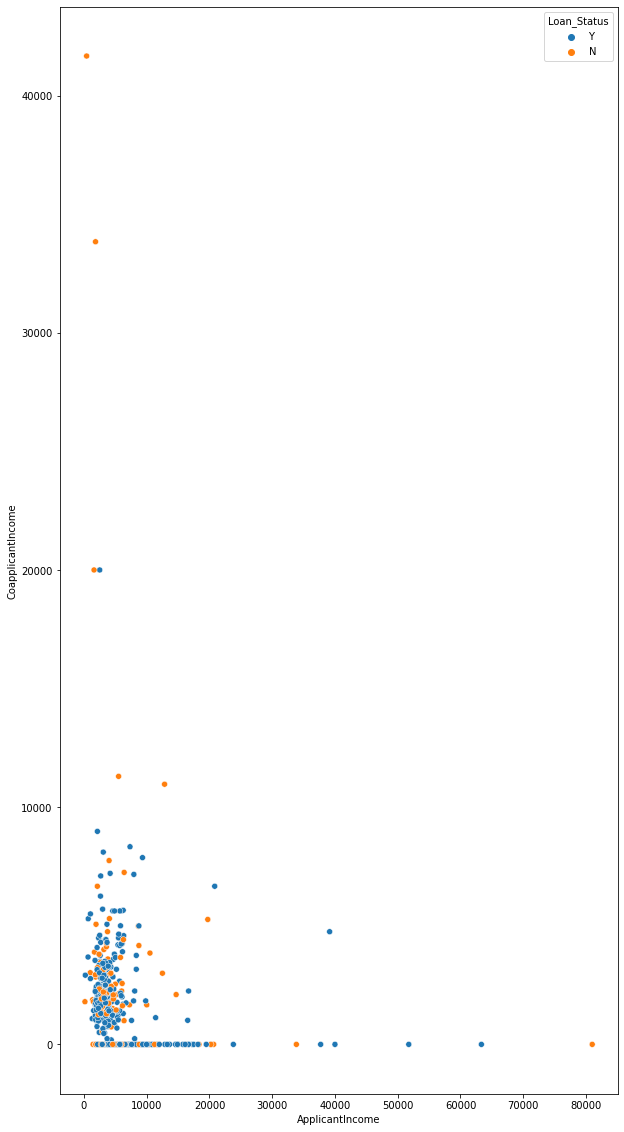

In [127]:
sns.scatterplot(data = loans, x = 'ApplicantIncome', y = 'CoapplicantIncome', hue = 'Loan_Status')

It seems that if `ApplicantIncome` is low but `CoapplicantIncome` is high, the loan is denied. This might be because perhaps the loan company requires the main applicant to have the higher income than the coapplicant since they'll be the one responsible for repayment.

# **Feature Importance**


In [128]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To better understand which features on our dataset are best at predicting the target `Loan_Status`, we decided to use XGBoost Classifier to determine which features have higher importance for predicting the target `Loan_Status` 

In [129]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xgboost
from xgboost import plot_importance

In [130]:
feature_names = loans.columns[:-1]

In [131]:
feature_names

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

Here, we mapped our labels for the target:

In [132]:
labels = loans.iloc[:,-1]
le = LabelEncoder()
le.fit(labels)
labels = le.transform(labels)
class_names = le.classes_
data = loans.iloc[:,:-1]
le_label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Class names: ", class_names)
print("Label mapping: ", le_label_mapping)

Class names:  ['N' 'Y']
Label mapping:  {'N': 0, 'Y': 1}


In [133]:
labels

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

Here, we checked if there are categorical varibles that we need to make dummies for, and generated a list of which variables are categorical

In [134]:
print(data.dtypes)

categorical_features  = [i for i in range(len(data.dtypes)) if data.dtypes[i]=='object']
print("Indices of categorical features: ", categorical_features)

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object
Indices of categorical features:  [0, 1, 2, 3, 4, 10]


Here, we used LabelEncoder to map categories to numbers, and replaced the categories with corresponding numbers in the original data

In [135]:
categorical_names = {}
for feature in categorical_features:
    print("Feature: ", feature)
    le = LabelEncoder()
    le.fit(loans.iloc[:, feature])
    loans.iloc[:, feature] = le.transform(loans.iloc[:, feature])
    categorical_names[feature] = le.classes_
    print(categorical_names[feature])
    print("==================================================")

Feature:  0
['Female' 'Male' 'unknown']
Feature:  1
['No' 'Yes' 'unknown']
Feature:  2
['0' '1' '2' '3+']
Feature:  3
['Graduate' 'Not Graduate']
Feature:  4
['No' 'Yes']
Feature:  10
['Rural' 'Semiurban' 'Urban']


In [136]:
categorical_names

{0: array(['Female', 'Male', 'unknown'], dtype=object),
 1: array(['No', 'Yes', 'unknown'], dtype=object),
 2: array(['0', '1', '2', '3+'], dtype=object),
 3: array(['Graduate', 'Not Graduate'], dtype=object),
 4: array(['No', 'Yes'], dtype=object),
 10: array(['Rural', 'Semiurban', 'Urban'], dtype=object)}

Here, we fit our encoder, using the adjusted `loan` data (we stored the adjusted version into `data`)

In [137]:
encoder = ColumnTransformer(transformers=[('get_dummies', OneHotEncoder(), categorical_features)], remainder='passthrough')
encoder = encoder.fit(data)

In [138]:
train, test, labels_train, labels_test = train_test_split(data, labels, train_size=0.90, random_state=10)
print("Train shape: ", train.shape)
print("Test shape: ", test.shape)

Train shape:  (552, 11)
Test shape:  (62, 11)


In [139]:
labels_train[1:100]

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1])

Here, we fit the XGBoost Tree Classifier with our data, performed an accuracy test, and checked which features are important to help us determine the target. 

In [140]:
gbtree = xgboost.XGBClassifier(n_estimators=100, max_depth=5)
gbtree.fit(encoder.transform(train), labels_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [141]:
pred_labels_test = gbtree.predict(encoder.transform(test))

print("Test set accuracy: ", accuracy_score(labels_test, pred_labels_test))

Test set accuracy:  0.7419354838709677


0
1
2
3
4
10


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

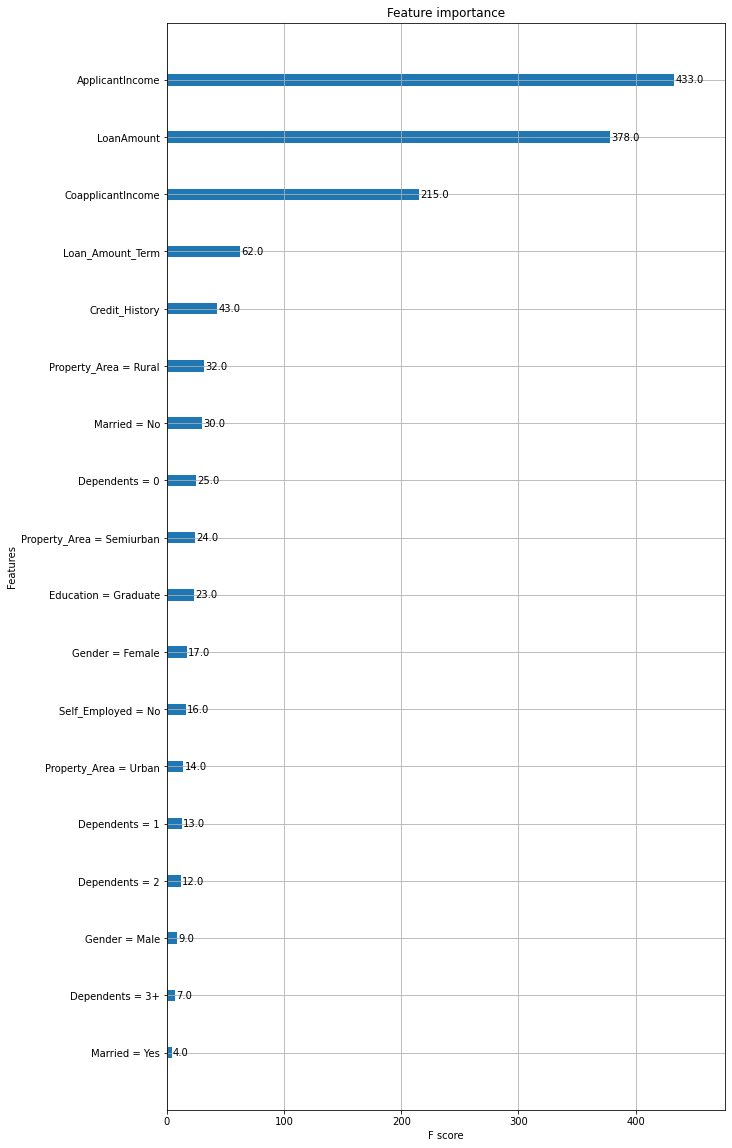

In [142]:
gbtree_features_orig = gbtree.get_booster().feature_names
gbtree_features = []

for cat_var in categorical_names:
  print(cat_var)
  cat_var_names = [feature_names[cat_var] +" = " + cat for cat in categorical_names[cat_var]]
  gbtree_features.extend(cat_var_names)
gbtree_features.extend([feature_names[i] for i in range(len(feature_names)) if i not in categorical_features])
gbtree.get_booster().feature_names = gbtree_features

plt.rcParams["figure.figsize"] = (10,20)
plot_importance(gbtree.get_booster(), )

The top 5 most importance features as shown by XGBoost are all numerical variables. This process will help to improve our CNN.

# **Training the CNN Model**

After using XGBoost Classifier to find important features, we decided to train a Convolutional Neural Network(CNN) model where we train it using important features such as `ApplicantIncome`, `LoanAmount`, `CoapplicantIncome`, `Loan_Amount_Term`, and `Credit_History` in order to predict whether a customer is eligible for a home loan.

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import load_model

In [144]:
data2 = data[['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']]
data2.head()

,ApplicantIncome,LoanAmount,CoapplicantIncome,Loan_Amount_Term,Credit_History
0,5849,NaN,0.0,360.0,1.0
1,4583,128.0,1508.0,360.0,1.0
2,3000,66.0,0.0,360.0,1.0
3,2583,120.0,2358.0,360.0,1.0
4,6000,141.0,0.0,360.0,1.0


I realize the remaining missing values will cause issues later on, so I removed the rows correlating to missing values. I did it both for the `data` and `label` and stored the results in `data2` and `label2`.

In [145]:
indices_with_missing_data = data2[data2.isnull().any(axis=1)].index
print(indices_with_missing_data)

Int64Index([  0,  19,  35,  36,  44,  45,  63,  73,  81,  95, 102, 103, 112,
            113, 127, 165, 197, 202, 223, 232, 284, 305, 322, 335, 338, 367,
            387, 421, 423, 435, 437, 479, 524, 550, 551, 605],
           dtype='int64')


In [146]:
data2.dropna(subset=['LoanAmount', 'Loan_Amount_Term'], inplace=True)
data2.shape

<ipython-input-146-316d79359c2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.dropna(subset=['LoanAmount', 'Loan_Amount_Term'], inplace=True)


(578, 5)

In [147]:
labels2 = np.delete(labels, indices_with_missing_data)
len(labels2)

578

We decided on splitting the data again, with 10% of the data being used for testing. We've then normalized the data using `MinMaxScaler()` to transform the data into something thats suitable for our model.

In [148]:
X_train, X_test, y_train, y_test = train_test_split(data2, labels2, test_size=0.20, random_state=101)

In [149]:
indices = X_test.index

In [150]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

There's only an input layer and an output layer for our CNN model. Usually its a rule of thumb that the number of neurons in the input layer equates to the number of features that you're inputting. That's 5 neurons, and to simulate a bias term, I used 6 neurons.

The output layer consists of just 1 neuron. We compile the model with the `binary_crossentropy` loss and the `adam` optimizer, and then fitted the model for 10 epochs.

In [151]:
model = Sequential()

# input layer
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [152]:
model.fit(x=X_train, y=y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
15/15 [==============================] - 1s 14ms/step - loss: 0.6941 - val_loss: 0.6947
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 0.6906 - val_loss: 0.6917
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 0.6879 - val_loss: 0.6888
Epoch 4/10
15/15 [==============================] - 0s 5ms/step - loss: 0.6848 - val_loss: 0.6859
Epoch 5/10
15/15 [==============================] - 0s 6ms/step - loss: 0.6824 - val_loss: 0.6830
Epoch 6/10
15/15 [==============================] - 0s 6ms/step - loss: 0.6793 - val_loss: 0.6803
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: 0.6759 - val_loss: 0.6775
Epoch 8/10
15/15 [==============================] - 0s 5ms/step - loss: 0.6723 - val_loss: 0.6748
Epoch 9/10
15/15 [==============================] - 0s 6ms/step - loss: 0.6690 - val_loss: 0.6718
Epoch 10/10
15/15 [==============================] - 0s 16ms/step - loss: 0.6667 - val_loss: 0.6688


<Axes: >

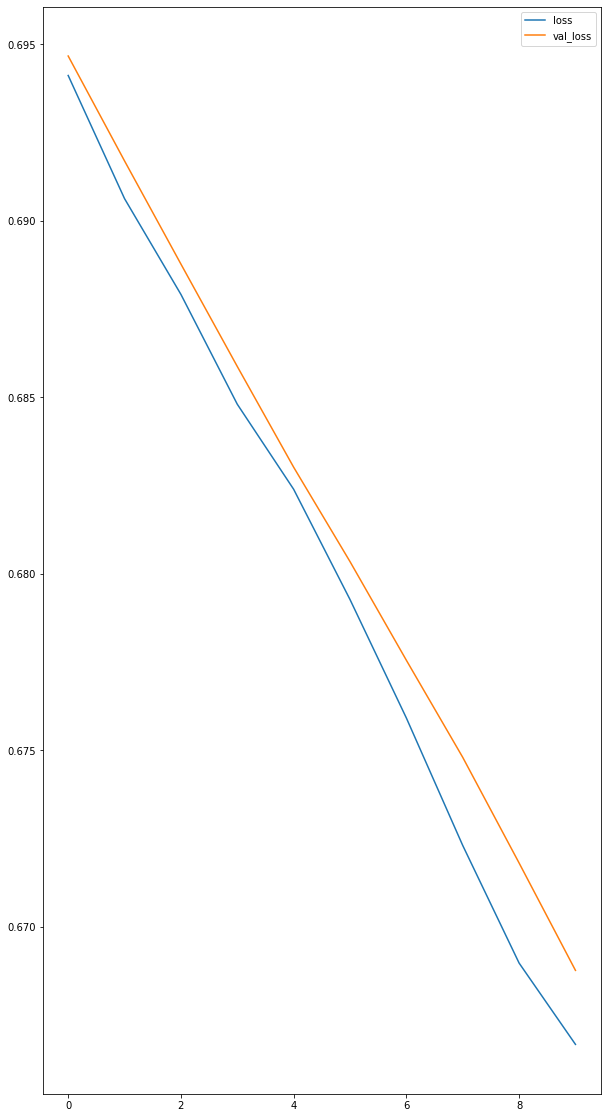

In [153]:
losses = pd.DataFrame(model.history.history)
losses.plot()

Overall, our accuracy for our model lies at 68%, which isn't too shabby, but there's definitely room for improvement.

In [154]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test,predictions))

4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.68      1.00      0.81        79

    accuracy                           0.68       116
   macro avg       0.34      0.50      0.41       116
weighted avg       0.46      0.68      0.55       116



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [155]:
from tensorflow.keras.models import load_model
model.save('synthethic_loan_model.h5')

# **Analyzing Fairness using Aequitas** 



We will analyze fairness with respect to different metrics in order to evaluate whether our CNN model produces biased or unbiased results across the different features. The fairness of the model is being analyzed by examining the aequitas libraries' results of the model's predictions of the test data based on the different features.



In [156]:
pip install aequitas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [157]:
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot

Create a new dataframe called test_df by selecting a subset of rows from our 'loans' dataframe.

In [158]:
test_df = loans.iloc[indices].copy()
test_df['label_value'] = y_test
test_df['score'] = predictions 
test_df = test_df[['Gender','Married', 'Property_Area', 'label_value', 'score']]

We can convert 'Gender', 'Married', and 'Property_Area' columns in the test_df dataframe to strings using the astype() method so that the columns are treated as categorical variables when analyzing the data.

In [159]:
test_df['Gender'] = test_df['Gender'].astype(str)
test_df['Married'] = test_df['Married'].astype(str)
test_df['Property_Area'] = test_df['Property_Area'].astype(str)
test_df = test_df[test_df["Married"].str.contains("2") == False].copy()

test_df

,Gender,Married,Property_Area,label_value,score
133,1,1,1,1,1
603,1,0,0,1,1
288,0,0,1,1,1
598,1,1,0,1,1
80,0,0,1,1,1
...,...,...,...,...,...
498,1,1,1,1,1
184,0,1,1,1,1
177,1,1,1,0,1
388,1,1,2,1,1


In [160]:
# evaluates bias for all subgroups
g = Group()
xtab, _ = g.get_crosstabs(test_df)

In [161]:
absolute_metrics = g.list_absolute_metrics(xtab)

These are the counts across sample population groups. As you can see from the table below our model always returned positive(1) values. This oviously affected the accuracy of our model, as seen in the section above, but it also affected the results of our fairness analysis, as we will see later on. 

In [162]:
# selects only the columns in the xtab table that represent the different features, and excludes the columns that represent the fairness metrics
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,115,Gender,0,23,0,7,0,0,16,16,7,23,115
1,0,binary 0/1,115,Gender,1,92,0,30,0,0,62,62,30,92,115
2,0,binary 0/1,115,Married,0,33,0,9,0,0,24,24,9,33,115
3,0,binary 0/1,115,Married,1,82,0,28,0,0,54,54,28,82,115
4,0,binary 0/1,115,Property_Area,0,37,0,16,0,0,21,21,16,37,115
5,0,binary 0/1,115,Property_Area,1,45,0,11,0,0,34,34,11,45,115
6,0,binary 0/1,115,Property_Area,2,33,0,10,0,0,23,23,10,33,115


In the table below we calculated absolute metrics for each sample population group. Since our model's predictions didn't include any negative outcomes, we got some NA values for false omission rate (for) and negative predictive value (npv), wich deal with the negative predictions. 

In [163]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,Gender,0,1.0,0.0,NaN,0.30,1.0,0.0,NaN,0.70,0.20,1.0,0.70
1,Gender,1,1.0,0.0,NaN,0.33,1.0,0.0,NaN,0.67,0.80,1.0,0.67
2,Married,0,1.0,0.0,NaN,0.27,1.0,0.0,NaN,0.73,0.29,1.0,0.73
3,Married,1,1.0,0.0,NaN,0.34,1.0,0.0,NaN,0.66,0.71,1.0,0.66
4,Property_Area,0,1.0,0.0,NaN,0.43,1.0,0.0,NaN,0.57,0.32,1.0,0.57
5,Property_Area,1,1.0,0.0,NaN,0.24,1.0,0.0,NaN,0.76,0.39,1.0,0.76
6,Property_Area,2,1.0,0.0,NaN,0.30,1.0,0.0,NaN,0.70,0.29,1.0,0.70


Bias allows us to measure the extent to which your model's predictions are biased against certain groups.

We calculated disparities in relation to the sample population majority group for each attribute. We did this to evaluate how much more or less other groups are correctly or incorrectly predicted to get mortgage loans in relation to the group with the most data. We again recieved NA values due to the lack of negative predictions.

In [164]:
b = Bias()
majority_bdf = b.get_disparity_major_group(xtab, original_df=test_df, mask_significance=True)

get_disparity_major_group()


In [165]:
# Bias() class includes a method to return a list of calculated disparities from the dataframe returned by the `get_disparity_` methods.
calculated_disparities = b.list_disparities(majority_bdf)
disparity_significance = b.list_significance(majority_bdf)

In [166]:
# View disparity metrics added to dataframe
# calculated_disparities is a list of disparity metrics calculated such as ppr_disparity, pprev_disparity, fnr_disparity, fpr_disparity
# disparity_significance is a list of boolean values showing whether the disparity metric for each feature is statistically significant (True) or not (False)
majority_bdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance]

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity
0,Gender,0,0.250000,1.0,1.032258,0.933333,NaN,1.0,NaN,1.0,NaN,NaN
1,Gender,1,1.000000,1.0,1.000000,1.000000,NaN,1.0,NaN,1.0,NaN,NaN
2,Married,0,0.402439,1.0,1.104377,0.798701,NaN,1.0,NaN,1.0,NaN,NaN
3,Married,1,1.000000,1.0,1.000000,1.000000,NaN,1.0,NaN,1.0,NaN,NaN
4,Property_Area,0,0.822222,1.0,0.751192,1.769042,NaN,1.0,NaN,1.0,NaN,NaN
5,Property_Area,1,1.000000,1.0,1.000000,1.000000,NaN,1.0,NaN,1.0,NaN,NaN
6,Property_Area,2,0.733333,1.0,0.922460,1.239669,NaN,1.0,NaN,1.0,NaN,NaN


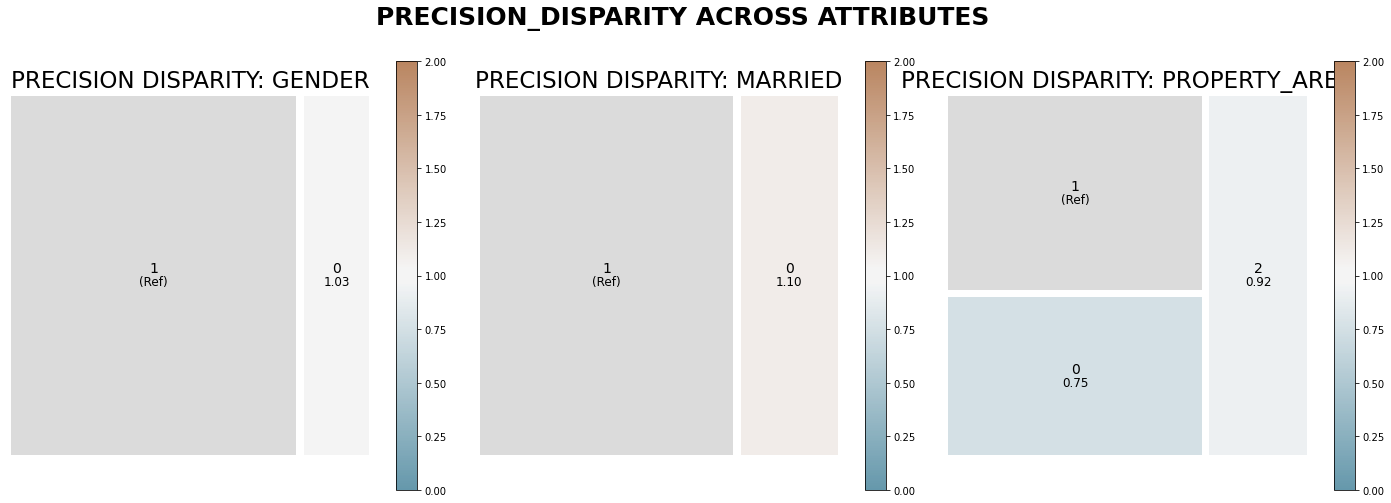

In [167]:
aqp = Plot()
j = aqp.plot_disparity_all(majority_bdf, metrics=['precision_disparity'], significance_alpha=0.05)

The Aequitas Fairness() class allows us to evaluate our model's fairness using various metrics such as false positive rate parity or false negative rate parity.


Below also shows: *Type I Parity*: Fairness in both FDR Parity and FPR Parity

*Type II Parity*: Fairness in both FOR Parity and FNR Parity

*Equalized Odds*: Fairness in both FPR Parity and TPR Parity

*Unsupervised Fairness*: Fairness in both Statistical Parity and Impact Parity

*Supervised Fairness*: Fairness in both Type I and Type II Parity

*Overall Fairness*: Fairness across all parities for all attributes

In [168]:
# generates fairness metrics for each attribute-value combination in the data
f = Fairness()
fdf = f.get_group_value_fairness(majority_bdf)

In [169]:
# shows if there are significant differences in the model performance across different subgroups, after comparing the results we can see there are differences!
parity_detrminations = f.list_parities(fdf)

The table below shows us the results of the unsupervised, supervised, and overall fairness in regards to our chosen protected attributes. We marriage status and property area in our fairness analysis, but are mainly looking at gender fairness. We can see that the fairness of our model failed across several metrics, but that is due to the NA values. 

In [170]:
# displays table below with fairness metrics and parity determinations for each group.
fdf[['attribute_name', 'attribute_value'] + absolute_metrics + calculated_disparities + parity_detrminations].style

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,for_disparity,fpr_disparity,fnr_disparity,tpr_disparity,tnr_disparity,npv_disparity,NPV Parity,FDR Parity,FOR Parity,FNR Parity,Impact Parity,Statistical Parity,FPR Parity,Precision Parity,TPR Parity,Unsupervised Fairness,TypeI Parity,Supervised Fairness,TNR Parity,TypeII Parity,Equalized Odds
0,Gender,0,1.000000,0.000000,nan,0.304348,1.000000,0.000000,nan,0.695652,0.200000,1.000000,0.695652,0.250000,1.000000,1.032258,0.933333,nan,1.000000,nan,1.000000,nan,nan,nan,True,nan,nan,True,False,True,True,True,False,True,False,nan,nan,True
1,Gender,1,1.000000,0.000000,nan,0.326087,1.000000,0.000000,nan,0.673913,0.800000,1.000000,0.673913,1.000000,1.000000,1.000000,1.000000,nan,1.000000,nan,1.000000,nan,nan,nan,True,nan,nan,True,True,True,True,True,True,True,False,nan,nan,True
2,Married,0,1.000000,0.000000,nan,0.272727,1.000000,0.000000,nan,0.727273,0.286957,1.000000,0.727273,0.402439,1.000000,1.104377,0.798701,nan,1.000000,nan,1.000000,nan,nan,nan,False,nan,nan,True,False,True,True,True,False,False,False,nan,nan,True
3,Married,1,1.000000,0.000000,nan,0.341463,1.000000,0.000000,nan,0.658537,0.713043,1.000000,0.658537,1.000000,1.000000,1.000000,1.000000,nan,1.000000,nan,1.000000,nan,nan,nan,True,nan,nan,True,True,True,True,True,True,True,False,nan,nan,True
4,Property_Area,0,1.000000,0.000000,nan,0.432432,1.000000,0.000000,nan,0.567568,0.321739,1.000000,0.567568,0.822222,1.000000,0.751192,1.769042,nan,1.000000,nan,1.000000,nan,nan,nan,False,nan,nan,True,True,True,False,True,True,False,False,nan,nan,True
5,Property_Area,1,1.000000,0.000000,nan,0.244444,1.000000,0.000000,nan,0.755556,0.391304,1.000000,0.755556,1.000000,1.000000,1.000000,1.000000,nan,1.000000,nan,1.000000,nan,nan,nan,True,nan,nan,True,True,True,True,True,True,True,False,nan,nan,True
6,Property_Area,2,1.000000,0.000000,nan,0.303030,1.000000,0.000000,nan,0.696970,0.286957,1.000000,0.696970,0.733333,1.000000,0.922460,1.239669,nan,1.000000,nan,1.000000,nan,nan,nan,True,nan,nan,True,False,True,True,True,False,True,False,nan,nan,True


Interpretation of parities: Our base groups are Gender, Married, and Property_Area.  By construction, the base group has supervised fairness. (The disparity ratio is 1). The fpr for most attributes are 1.0.

In [171]:
female_df = test_df.loc[test_df['Gender'] == '0']
male_df = test_df.loc[test_df['Gender'] == '1']

Calculated the confusion matrix for the male_df dataframe, which represents the predicted versus actual values of the target variable (i.e., label_value) for the male subgroup of the data.

display_labels parameter specifies the labels: False and True, representing the negative and positive labels of the target variable.

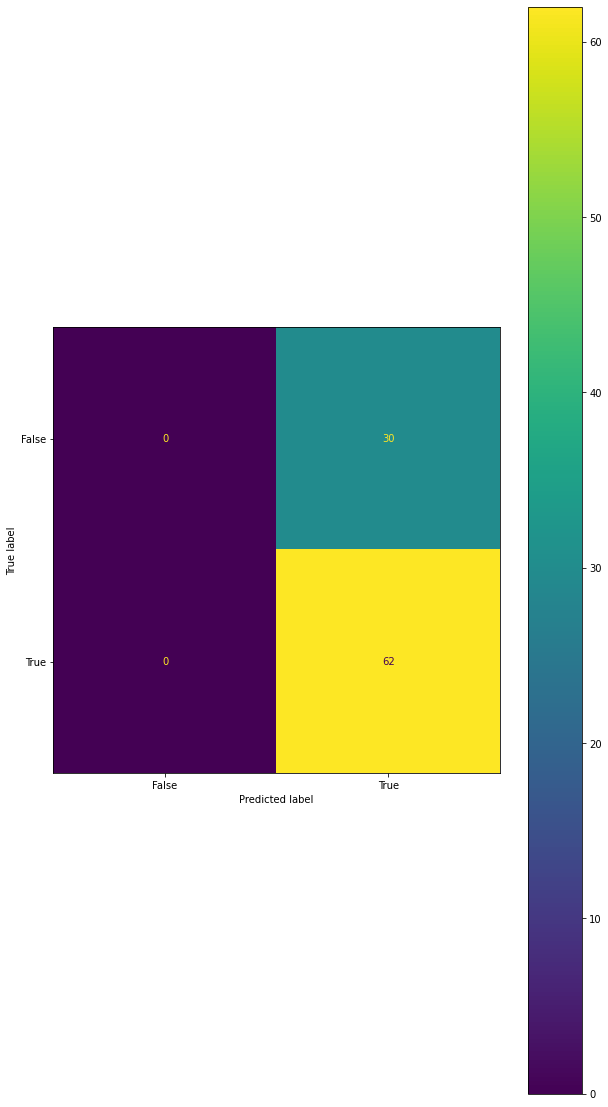

In [172]:
from sklearn import metrics
mcm = metrics.confusion_matrix(male_df['label_value'], male_df['score'])
metrics.ConfusionMatrixDisplay(confusion_matrix = mcm, display_labels = [False, True]).plot()

Calculated the confusion matrix for the female_df dataframe, which represents the predicted versus actual values of the target variable for the female subgroup of the data. 

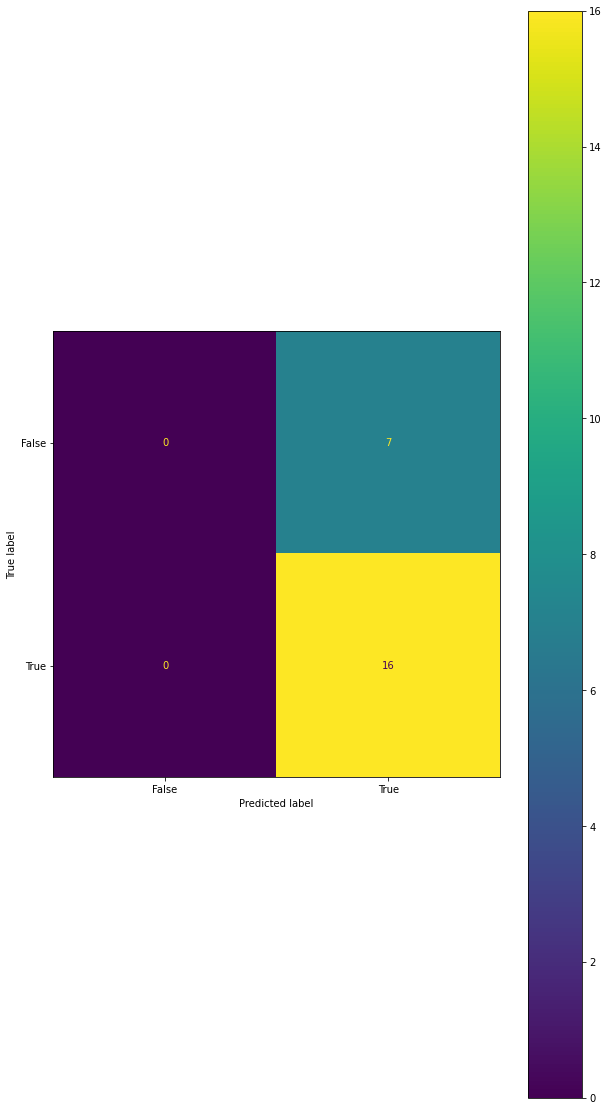

In [173]:
fcm = metrics.confusion_matrix(female_df['label_value'], female_df['score'])
metrics.ConfusionMatrixDisplay(confusion_matrix = fcm, display_labels = [False, True]).plot()

Since out aequitas analysis returned several NA values, we decided to manually analyze the fainess in our model. 

In [174]:
f_true_positive  = fcm[1][1]
f_true_negative  = fcm[0][0]
f_false_positive = fcm[0][1]
f_false_negative = fcm[1][0]

In [175]:
m_true_positive  = mcm[1][1]
m_true_negative  = mcm[0][0]
m_false_positive = mcm[0][1]
m_false_negative = mcm[1][0]

In [176]:
#Equal Opportunity ratio
#positive predictions at the same rate for both groups
m_tpr = m_true_positive / (m_true_positive + m_false_negative)
f_tpr = f_true_positive / (f_true_positive + f_false_negative)
print('Male tpr')
print(m_tpr)
print('Female tpr')
print(f_tpr)

Male tpr
1.0
Female tpr
1.0


In [177]:
#Predictive Parity Ratio
m_ppv = m_true_positive / (m_true_positive + m_false_positive)
f_ppv = f_true_positive / (f_true_positive + f_false_positive)

print('Male ppv')
print(m_ppv)
print('Female ppv')
print(f_ppv)

Male ppv
0.6739130434782609
Female ppv
0.6956521739130435


In [178]:
#Predictive Equality Ratio
# both the male and female FPR are 1.0, means both groups have the same rate of false positives
m_fpr = m_false_positive / (m_false_positive + m_true_negative)
f_fpr = f_false_positive / (f_false_positive + f_true_negative)

print('Male fpr')
print(m_fpr)
print('Female fpr')
print(f_fpr)

Male fpr
1.0
Female fpr
1.0


Below, the accuracy equality ratio measures the difference between the accuracy of two groups, with a value of 1 indicating perfect equality, and a value closer to 0 indicating greater inequality. The values indicates a relatively small difference in accuracy between the two groups.

In [179]:
#Accuracy Equality Ratio
m_acc = (m_true_positive + m_true_negative) / (m_true_positive + m_true_negative + m_false_positive + m_false_negative)
f_acc = (f_true_positive + f_true_negative) / (f_true_positive + f_true_negative + f_false_positive + f_false_negative)

print('Male acc')
print(m_acc)
print('Female acc')
print(f_acc)

Male acc
0.6739130434782609
Female acc
0.6956521739130435


In [180]:
#Statistical Parity Ratio
m_stp = (m_true_positive + m_false_positive) / (m_true_positive + m_true_negative + m_false_positive + m_false_negative)
f_stp = (f_true_positive + f_false_positive) / (f_true_positive + f_true_negative + f_false_positive + f_false_negative)

print('Male stp')
print(m_stp)
print('Female stp')
print(f_stp)

Male stp
1.0
Female stp
1.0


Above we calculated, equal opportunity ratio, predictive parity ratio, predictive equality ratio, accuracy equality ratio, and statistical parity ratio. Our results for all these metrics for both male and females were fairly close. 

From all the analysis in section and the results of the aequitas audit tool kit on their website, we can conclude that our model is fair and shows no gender bias.

# **Mitigating Bias**

To mitigate bias in the data, we can use two techniques: SMOTE oversampling and data normalization using MinMaxScaler. SMOTE will balance the data by creating more examples of underrepresented groups. Normalizing the data makes sure all features have a similar scale, so that no single feature dominates the results. This can prevent bias caused by features with larger ranges having more impact on the results compared to others. Conclusion: Before mitigating bias, we found that our model produces a 68% accuracy, and we can see that applying mitigating bias decreases our accuracy rate (about 64%) on the test data which occurs after balancing and scaling.

In [181]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess the data
X_train, X_test, y_train, y_test = train_test_split(data2, labels2, test_size=0.20, random_state=42)

# Print distribution before balancing
print("Before balancing:", Counter(y_train))

S=SMOTE()
X_train_data, y_train_data = S.fit_resample(X_train, y_train)

# Print distribution after balancing
print("After balancing:", Counter(y_train_data))

scalar = MinMaxScaler()
scalar.fit(X_train_data)

X_train_scaled = scalar.transform(X_train_data)
X_test_scaled = scalar.transform(X_test)


model.fit(X_train_scaled, y_train_data,epochs=10, batch_size=32)

accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Before balancing: Counter({1: 324, 0: 138})
After balancing: Counter({0: 324, 1: 324})
Epoch 1/10
21/21 [==============================] - 0s 3ms/step - loss: 0.7020
Epoch 2/10
21/21 [==============================] - 0s 3ms/step - loss: 0.6990
Epoch 3/10
21/21 [==============================] - 0s 4ms/step - loss: 0.6974
Epoch 4/10
21/21 [==============================] - 0s 4ms/step - loss: 0.6959
Epoch 5/10
21/21 [==============================] - 0s 3ms/step - loss: 0.6950
Epoch 6/10
21/21 [==============================] - 0s 3ms/step - loss: 0.6944
Epoch 7/10
21/21 [==============================] - 0s 4ms/step - loss: 0.6931
Epoch 8/10
21/21 [==============================] - 0s 3ms/step - loss: 0.6926
Epoch 9/10
21/21 [==============================] - 0s 3ms/step - loss: 0.6916
Epoch 10/10
4/4 [==============================] - 0s 7ms/step - loss: 0.6797
Accuracy: 67.97%
